In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('Dataset/Bengaluru_House_Data.csv')

In [6]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.shape

(13320, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [10]:
df1= df.drop(['area_type', 'availability', 'society'], axis=1)
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [12]:
df2=df1.dropna()

In [13]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [14]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\DELL\AppData\Local\Temp\ipykernel_11536\1142257054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [15]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [16]:
# df2.drop('size', axis=1, inplace=True)

In [17]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def isfloat(x):
    try:
        float(x)
    except:
        print(x)

In [19]:
df2['total_sqft'].apply(isfloat)

2100 - 2850
3067 - 8156
1042 - 1105
1145 - 1340
1015 - 1540
34.46Sq. Meter
1195 - 1440
1120 - 1145
3090 - 5002
1160 - 1195
1000Sq. Meter
1115 - 1130
520 - 645
1000 - 1285
650 - 665
633 - 666
5.31Acres
30Acres
1445 - 1455
884 - 1116
850 - 1093
716Sq. Meter
547.34 - 827.31
580 - 650
3425 - 3435
1804 - 2273
3630 - 3800
4000 - 5249
1500Sq. Meter
142.61Sq. Meter
1574Sq. Yards
1250 - 1305
670 - 980
1005.03 - 1252.49
3630 - 3800
1004 - 1204
645 - 936
2710 - 3360
2830 - 2882
596 - 804
1255 - 1863
1300 - 1405
117Sq. Yards
934 - 1437
980 - 1030
2249.81 - 4112.19
1070 - 1315
3040Sq. Meter
500Sq. Yards
2806 - 3019
613 - 648
704 - 730
1210 - 1477
3369 - 3464
1125 - 1500
167Sq. Meter
1076 - 1199
381 - 535
524 - 894
540 - 670
2725 - 3250
888 - 1290
660 - 700
385 - 440
770 - 841
524 - 894
3Cents
188.89Sq. Yards
1469 - 1766
204Sq. Meter
1255 - 1350
870 - 1080
45Sq. Yards
133.3Sq. Yards
2580 - 2591
613 - 648
2563 - 2733
605 - 624
1349 - 3324
78.03Sq. Meter
1255 - 1350
3300 - 3335
1180 - 1630
1365 - 1700

0        None
1        None
2        None
3        None
4        None
         ... 
13314    None
13315    None
13317    None
13318    None
13319    None
Name: total_sqft, Length: 12710, dtype: object

In [20]:
def sqft_to_num(x):
    tokens=x.split()
    try:
        return float(x)
    except:
        return None
    if len(tokens)==2:
        return (float(tokens[0]) + float(tokens[1]))/2

In [21]:
df2['total_sqft'].apply(sqft_to_num)

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13314    1715.0
13315    3453.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 12710, dtype: float64

In [22]:
df2['total_sqft'].apply(isfloat)

2100 - 2850
3067 - 8156
1042 - 1105
1145 - 1340
1015 - 1540
34.46Sq. Meter
1195 - 1440
1120 - 1145
3090 - 5002
1160 - 1195
1000Sq. Meter
1115 - 1130
520 - 645
1000 - 1285
650 - 665
633 - 666
5.31Acres
30Acres
1445 - 1455
884 - 1116
850 - 1093
716Sq. Meter
547.34 - 827.31
580 - 650
3425 - 3435
1804 - 2273
3630 - 3800
4000 - 5249
1500Sq. Meter
142.61Sq. Meter
1574Sq. Yards
1250 - 1305
670 - 980
1005.03 - 1252.49
3630 - 3800
1004 - 1204
645 - 936
2710 - 3360
2830 - 2882
596 - 804
1255 - 1863
1300 - 1405
117Sq. Yards
934 - 1437
980 - 1030
2249.81 - 4112.19
1070 - 1315
3040Sq. Meter
500Sq. Yards
2806 - 3019
613 - 648
704 - 730
1210 - 1477
3369 - 3464
1125 - 1500
167Sq. Meter
1076 - 1199
381 - 535
524 - 894
540 - 670
2725 - 3250
888 - 1290
660 - 700
385 - 440
770 - 841
524 - 894
3Cents
188.89Sq. Yards
1469 - 1766
204Sq. Meter
1255 - 1350
870 - 1080
45Sq. Yards
133.3Sq. Yards
2580 - 2591
613 - 648
2563 - 2733
605 - 624
1349 - 3324
78.03Sq. Meter
1255 - 1350
3300 - 3335
1180 - 1630
1365 - 1700

0        None
1        None
2        None
3        None
4        None
         ... 
13314    None
13315    None
13317    None
13318    None
13319    None
Name: total_sqft, Length: 12710, dtype: object

In [23]:
df3=df2.copy()

In [24]:
df3['total_sqft'] = df3['total_sqft'].apply(sqft_to_num)

In [25]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12710 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12710 non-null  object 
 1   size        12710 non-null  object 
 2   total_sqft  12524 non-null  float64
 3   bath        12710 non-null  float64
 4   balcony     12710 non-null  float64
 5   price       12710 non-null  float64
 6   bhk         12710 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 794.4+ KB


In [27]:
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [28]:
len(df3['location'].unique())

1265

In [29]:
df3['location'] = df3['location'].apply(lambda x: x.strip())

In [30]:
location_stats = df3.groupby('location').size().sort_values(ascending=False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Length: 1254, dtype: int64

In [31]:
df3.groupby('location').size().sort_values(ascending=False).mean()

10.135566188197767

In [32]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Length: 1017, dtype: int64

In [33]:
df3['location'] = df3['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [34]:
len(df3['location'].unique())

238

#### Identifying and Removing Outliers

In [35]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [36]:
df3['total_sqft']/df3['bhk']

0         528.000000
1         650.000000
2         480.000000
3         507.000000
4         600.000000
            ...     
13314     571.666667
13315     690.600000
13317     570.500000
13318    1172.250000
13319     550.000000
Length: 12710, dtype: float64

In [37]:
df3[(df3['total_sqft']/df3['bhk'])<300]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...,...
13219,Laggere,7 Bedroom,1590.0,9.0,3.0,132.0,7,8301.886792
13221,other,9 Bedroom,1178.0,9.0,1.0,75.0,9,6366.723260
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


In [38]:
df4 = df3[~(df3['total_sqft']/df3['bhk']<300)]

In [39]:
df4.shape

(12055, 8)

In [40]:
df4['price_per_sqft'].describe()

count     11869.000000
mean       6220.296579
std        4004.343212
min         267.829813
25%        4198.473282
50%        5263.157895
75%        6844.741235
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(9750, 8)

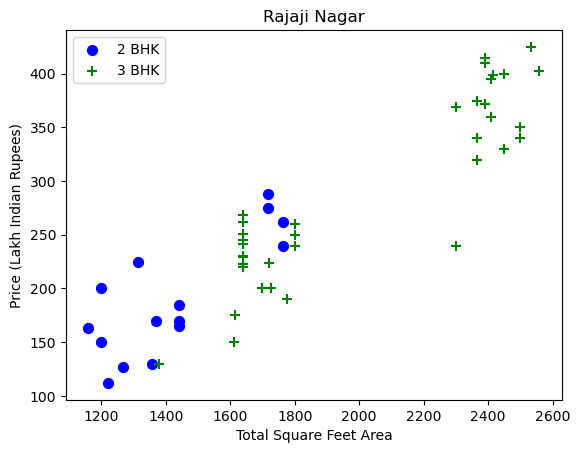

In [42]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
# df8 = df7.copy()
df6.shape

(6917, 8)

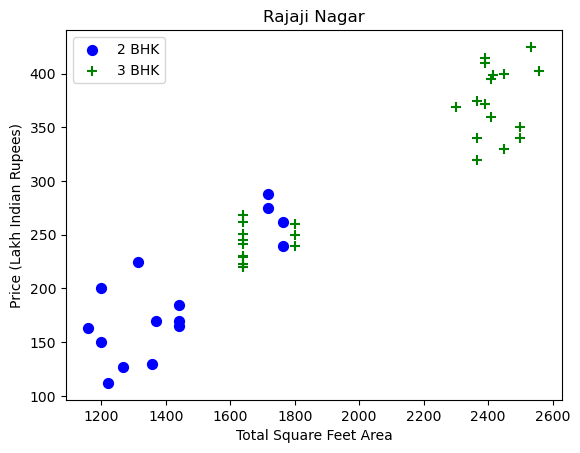

In [44]:
plot_scatter_chart(df6,"Rajaji Nagar")

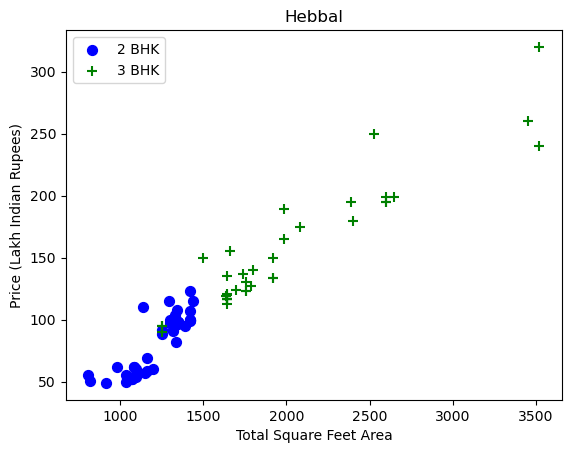

In [45]:
plot_scatter_chart(df6,"Hebbal")

Text(0, 0.5, 'Count')

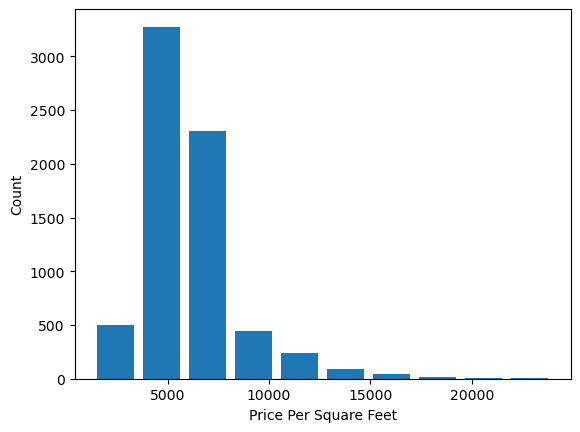

In [46]:
plt.hist(df6['price_per_sqft'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [47]:
df6['bath'].unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

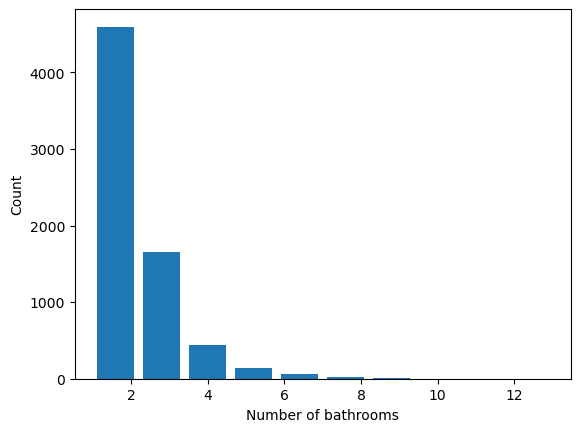

In [48]:
plt.hist(df6['bath'],rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [49]:
df6[df6.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9172,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [50]:
df6.drop(9172,axis=0,inplace=True)

In [51]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1525,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6385,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
7997,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [80]:
df6['balcony'].unique()

array([1., 2., 3., 0.])

In [97]:
df6.groupby('balcony')['bhk'].mean()

balcony
0.0    2.372460
1.0    2.209877
2.0    2.588193
3.0    3.021357
Name: bhk, dtype: float64

In [113]:
df7.drop('location', axis=1).corr()

,total_sqft,bath,balcony,price,bhk
total_sqft,1.000000,0.747702,0.280434,0.831360,0.712217
bath,0.747702,1.000000,0.288472,0.618676,0.869171
balcony,0.280434,0.288472,1.000000,0.209720,0.275883
price,0.831360,0.618676,0.209720,1.000000,0.573917
bhk,0.712217,0.869171,0.275883,0.573917,1.000000


In [114]:
df7 = df6.drop(['size','price_per_sqft','balcony'],axis='columns')
df7.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [115]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6916 entries, 0 to 9747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    6916 non-null   object 
 1   total_sqft  6916 non-null   float64
 2   bath        6916 non-null   float64
 3   price       6916 non-null   float64
 4   bhk         6916 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 324.2+ KB


In [116]:
dummies = pd.get_dummies(df7['location'], dtype='int')

In [117]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [118]:
df8=pd.concat([df7,dummies.drop('other',axis=1)],axis=1)

In [119]:
df8.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
df8.drop('location', axis=1, inplace=True)

In [121]:
df8.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
X=df8.drop('price', axis=1)
y=df8['price']

In [123]:
X.shape, y.shape

((6916, 240), (6916,))

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lr=LinearRegression()

In [127]:
lr.fit(X_train,y_train)

LinearRegression()

In [128]:
lr.score(X_test, y_test)

0.8806059640323327

In [129]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.78466255, 0.83665506, 0.84864652, 0.82292954, 0.79501862])

In [130]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_pa

,model,best_score,best_params
0,lasso,0.673838,"{'alpha': 1, 'selection': 'cyclic'}"
1,decision_tree,0.676502,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

In [133]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [134]:
predict_price('1st Phase JP Nagar',1000, 2, 4)

D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.33600478529033

In [137]:
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [136]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))